# CST 383 - Final Project Update
    BayTech
- Warren Ngoun (wngoun@csumb.edu)
- Yukio Rivera (yrivera@csumb.edu)
- Jennah Yasin (jyasin@csumb.edu)
- Luis Jimenez Barrios (ljimenezbarrios@csumb.edu) 
---
TODO: Check to make sure all links work
### Table of Contents:
- Intro
    - Our choice of dataset
    - What we are going to predict
    - The features we plan to use as predictors
- [Data Preprocessing & Investigation](#data-investigation-and-preprocessing)
    - Categorical to Numerical Encoding
    - Correlation and Heatmaps
    - Dealing with NaNs
- [Exploration & Visualization](#data-exploration)
- [Preliminary work on Machine Learning](#training)
    - Choice of Classifier Model
    - Hyper-parameter Testing
- [Conclusions](#conclusions)
---

# Intro
[Back to Top](#table-of-contents)

We chose the Airline Passenger Satisfaction dataset for our final project because we are all interested in satisfying flight experiences and believe that it is important for airlines to take their passenger's reviews into consideration. 

With this dataset, we are going to predict what factors may be most relevant and most correlated to the passenger's satisfaction. We will be analyzing which features are most correlated to our topic and dropping those that aren't as relevant/needed. 

We plan to use the "satisfaction" feature as our target label for this project. 
The features that we plan to use as predictors for our project are: Seat comfort, in-flight entertainment, cleanliness, and food & drinks.

#### Column Contents
Taken from the Kaggle Repo description.

- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0: Not Applicable; 1-5 stars)
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Satisfaction: Airline satisfaction level(Satisfaction or `0`, neutral/dissatisfied or `1`)

#### Imports
All the necessary imports we need for the project.

In [441]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# For ML Work
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import LabelEncoder # potentially unused
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix

From our dataset, we have two files from the original Kaggle repo, an already split training and test csv, so we made two separate data frames and all the pre-processing and changes we do will be applied to both so later tests and predictions all have the same columns to draw from.

In [442]:
df = pd.read_csv('https://raw.githubusercontent.com/BayTech-CSUMB/CST383Final/main/train.csv')
dfTest = pd.read_csv('https://raw.githubusercontent.com/BayTech-CSUMB/CST383Final/main/test.csv')

# Data Investigation and Preprocessing
[Back to Top](#table-of-contents)

First we do some preliminary looking at our dataset with `info()` and `describe()`.

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Our below describe shows us that a lot of our column data is from a range of 0.0 to 5.0, akin to a star rating. Others are in full ints like *flight distance* or *food and drink*. We will z-score normalize our data when we start the [Machine Learning training](#training).

In [444]:
df.describe().round(1)

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103594.0
mean,51951.5,64924.2,39.4,1189.4,2.7,3.1,2.8,3.0,3.2,3.3,3.4,3.4,3.4,3.4,3.6,3.3,3.6,3.3,14.8,15.2
std,29994.6,37463.8,15.1,997.1,1.3,1.5,1.4,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.2,1.3,1.2,1.3,38.2,38.7
min,0.0,1.0,7.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,25975.8,32533.8,27.0,414.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
50%,51951.5,64856.5,40.0,843.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,0.0,0.0
75%,77927.2,97368.2,51.0,1743.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,12.0,13.0
max,103903.0,129880.0,85.0,4983.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1592.0,1584.0


Lets see which columns are categorical.

In [445]:
df.dtypes[df.dtypes == 'object']

Gender            object
Customer Type     object
Type of Travel    object
Class             object
satisfaction      object
dtype: object

For each of those above categories, lets investigate the values.

In [446]:
print(df['Gender'].value_counts())

Female    52727
Male      51177
Name: Gender, dtype: int64


In [447]:
print(df['Customer Type'].value_counts())

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64


In [448]:
print(df['Type of Travel'].value_counts())

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64


In [449]:
print(df['Class'].value_counts())

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64


In [450]:
print(df['Type of Travel'].value_counts())

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64


Now we'll go ahead and One-Hot Encode all of those categorical values and then label encode *satisfaction* so we can use a single column for the [machine learning](#training).

In [451]:
cols = ['Gender', 'Type of Travel', 'Class', 'Customer Type']

for col in cols:
    catCol = pd.get_dummies(df[col], prefix=col)
    df.drop(col, axis=1, inplace=True)
    df = pd.concat([df, catCol], axis=1)
    # Repeat but for our test data set too.
    catCol2 = pd.get_dummies(dfTest[col], prefix=col)
    dfTest.drop(col, axis=1, inplace=True)
    dfTest = pd.concat([dfTest, catCol2], axis=1)

In [452]:
# Here we made a copy so that when we later try and visualize the data we can get properly labeled graphs. 
satisfactionForGraphing = df['satisfaction'].copy()
# Checking before and after. 0 = neutral/dissatisfied 1 = satisfied
print(df['satisfaction'].value_counts())
df['satisfaction'] = df['satisfaction'].astype('category').cat.codes
print(df['satisfaction'].value_counts())

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64
0    58879
1    45025
Name: satisfaction, dtype: int64


Lets check out the different columns from both of our data frames now.

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Flight Distance                    103904 non-null  int64  
 4   Inflight wifi service              103904 non-null  int64  
 5   Departure/Arrival time convenient  103904 non-null  int64  
 6   Ease of Online booking             103904 non-null  int64  
 7   Gate location                      103904 non-null  int64  
 8   Food and drink                     103904 non-null  int64  
 9   Online boarding                    103904 non-null  int64  
 10  Seat comfort                       103904 non-null  int64  
 11  Inflight entertainment             1039

In [454]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Age                                25976 non-null  int64  
 3   Flight Distance                    25976 non-null  int64  
 4   Inflight wifi service              25976 non-null  int64  
 5   Departure/Arrival time convenient  25976 non-null  int64  
 6   Ease of Online booking             25976 non-null  int64  
 7   Gate location                      25976 non-null  int64  
 8   Food and drink                     25976 non-null  int64  
 9   Online boarding                    25976 non-null  int64  
 10  Seat comfort                       25976 non-null  int64  
 11  Inflight entertainment             25976 non-null  int

We went from 24 columns to 29 now after encoding.

#### NaN Processing

Now we're interested if there are still any NaN values left in our dataset and then if the data will be suitable for imputation.

In [455]:
print(f'There are {df.isna().sum().sum()} NaN values in df.')
df.isna().sum()

There are 310 NaN values in df.


Unnamed: 0                             0
id                                     0
Age                                    0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
Gender_Female                          0
Gender_Male                            0
Type of Travel_Business travel         0
Type of Travel_P

In [456]:
print(f'There are {dfTest.isna().sum().sum()} NaN values in our test df.')
dfTest.isna().sum()

There are 83 NaN values in our test df.


Unnamed: 0                            0
id                                    0
Age                                   0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
Gender_Female                         0
Gender_Male                           0
Type of Travel_Business travel        0
Type of Travel_Personal Travel        0


In [457]:
# Calculate the average of the column
average_delay = df['Arrival Delay in Minutes'].mean()
average_delay_test = dfTest['Arrival Delay in Minutes'].mean()
# Impute & replace NaNs with the average value
df['Arrival Delay in Minutes'].fillna(value=average_delay, inplace=True)
dfTest['Arrival Delay in Minutes'].fillna(value=average_delay_test, inplace=True)

In [458]:
print(f'There are {df.isna().sum().sum()} NaN values in df.')
print(f'There are {dfTest.isna().sum().sum()} NaN values in our test df.')

There are 0 NaN values in df.
There are 0 NaN values in our test df.


#### Correlation Heatmap & Column Dropping

We're interested in also trimming out unnecessary columns from the dataset so there are less potential noisy predictors. Here we have two correlation heat maps, one of before and after a purging of potential columns.

<AxesSubplot:>

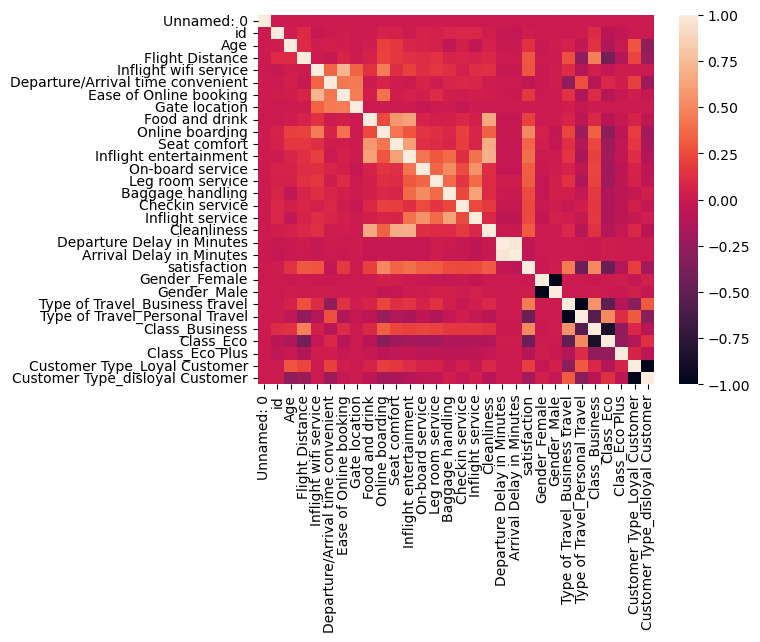

In [459]:
corrDfOld = df.corr()
sns.heatmap(corrDfOld, xticklabels=corrDfOld.columns, yticklabels=corrDfOld.columns)

<AxesSubplot:>

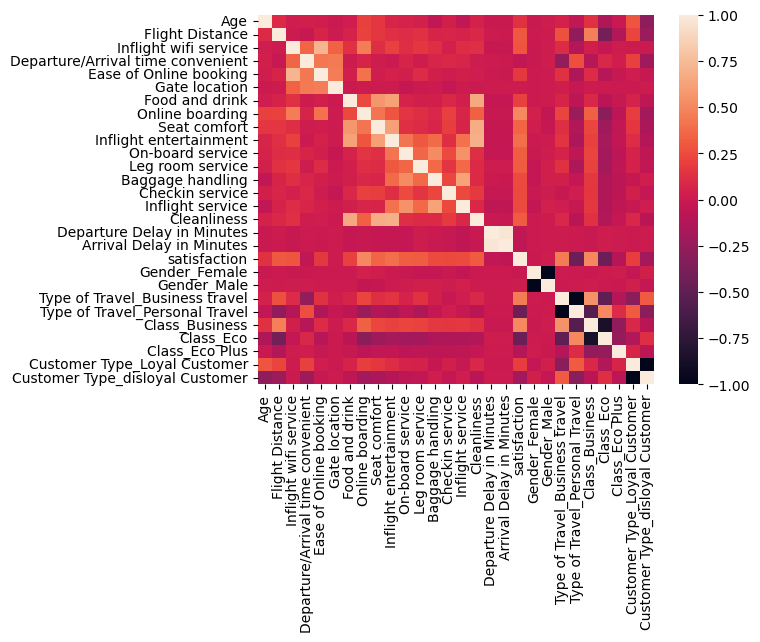

In [460]:
corrDf = df.copy()
corrDf.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
correlation = corrDf.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)

There weren't too many hard correlations in our data now after encoding, other than some with the data formerly in encoded in binary categories like *Gender*. So considering that, we officially drop the "extra" columns from our dataset and investigate what's left again, leaving a majority of the data intact after all. We are now ultimately left with 27 columns, 26 potential predictors and 1 label.

In [461]:
toDropCols = ['id', 'Unnamed: 0']
df.drop(toDropCols, axis=1, inplace=True)
dfTest.drop(toDropCols, axis=1, inplace=True)

In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103904 non-null  int64  
 1   Flight Distance                    103904 non-null  int64  
 2   Inflight wifi service              103904 non-null  int64  
 3   Departure/Arrival time convenient  103904 non-null  int64  
 4   Ease of Online booking             103904 non-null  int64  
 5   Gate location                      103904 non-null  int64  
 6   Food and drink                     103904 non-null  int64  
 7   Online boarding                    103904 non-null  int64  
 8   Seat comfort                       103904 non-null  int64  
 9   Inflight entertainment             103904 non-null  int64  
 10  On-board service                   103904 non-null  int64  
 11  Leg room service                   1039

# Data Exploration
[Back to Top](#table-of-contents)

Now we look at certain columns and the relationships between them via graphing. Our satisfaction (which will be our labels) are a binary option with only two answers (neutral or dissatisfied or satisfied).

### Visualizations

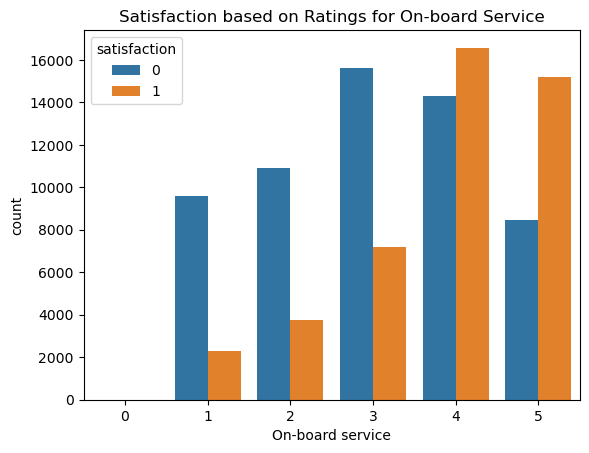

In [463]:
# Passenger's satisfaction based on the Ratings of On-board Service
sns.countplot(x=df['On-board service'], hue="satisfaction", data=df)
plt.title('Satisfaction based on Ratings for On-board Service')
plt.show()

In [464]:
# Passenger's satisfaction based off of Class

# sns.countplot(x='Class', hue='satisfaction', data=df)
# plt.title('Satisfaction based on class')
# plt.show()

Passenger's Satisfaction based off of Seat Comfort Ratings:

Text(0, 0.5, 'Satisfaction')

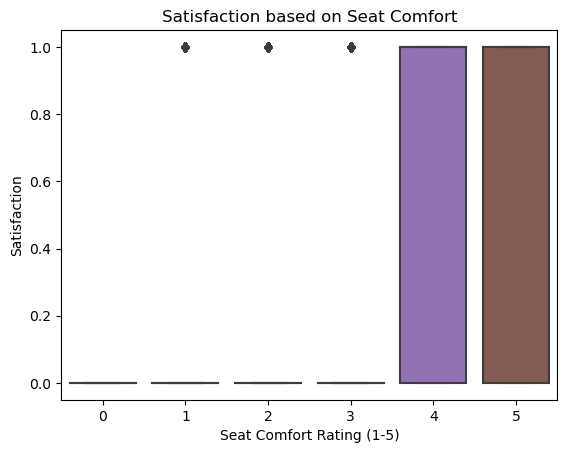

In [465]:
sns.boxplot(data=df, x = df['Seat comfort'], y = df['satisfaction'])
plt.title('Satisfaction based on Seat Comfort')

plt.xlabel('Seat Comfort Rating (1-5)')
plt.ylabel('Satisfaction')

Based on the results, it appears that passengers who rated Seat Comfort between a 4-5 (high comfort) were satisfied compared to those who rated the seat comfort less than a 4, were not satisfied. There are two outliers that have chosen to be satisfied although they rated the seat comfort a 1 or 2. 

Passenger's Satisfaction based off of Cleanliness Ratings

Text(0.5, 1.0, 'Satisfaction based on Cleanliness')

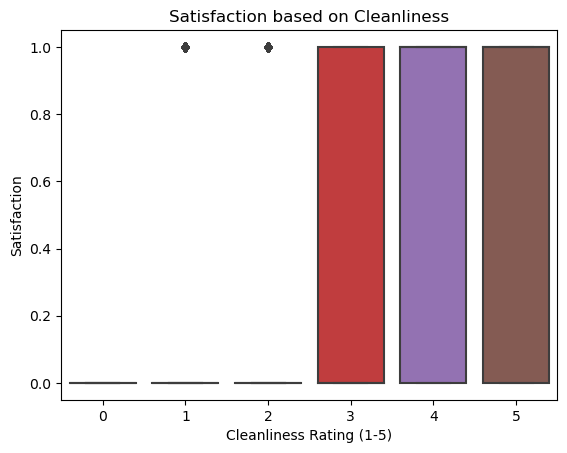

In [466]:
sns.boxplot(data=df, x=df['Cleanliness'], y = df['satisfaction'])
plt.xlabel('Cleanliness Rating (1-5)')
plt.ylabel('Satisfaction')
plt.title('Satisfaction based on Cleanliness')

This plot shows the higher the cleanliness rating (3-5), the more likely satisfied the passenger was and the lower the cleanliness rating(1-~3), the more likely they weren't satisfied.

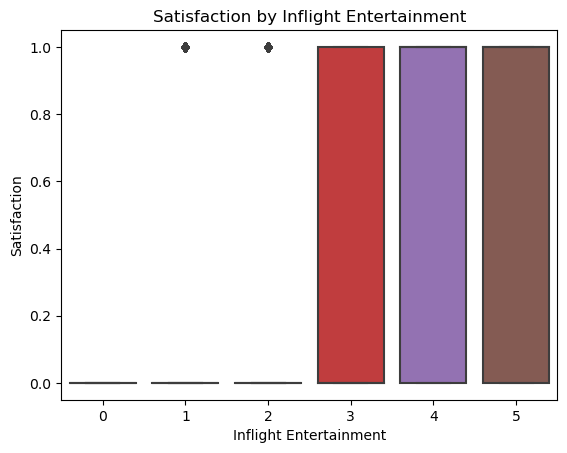

In [467]:
# Passenger's Satisfaction based off of Inflight Entertainment

sns.boxplot(x='Inflight entertainment', y='satisfaction', data=df)

plt.title('Satisfaction by Inflight Entertainment')
plt.xlabel('Inflight Entertainment')
plt.ylabel('Satisfaction')
plt.show()

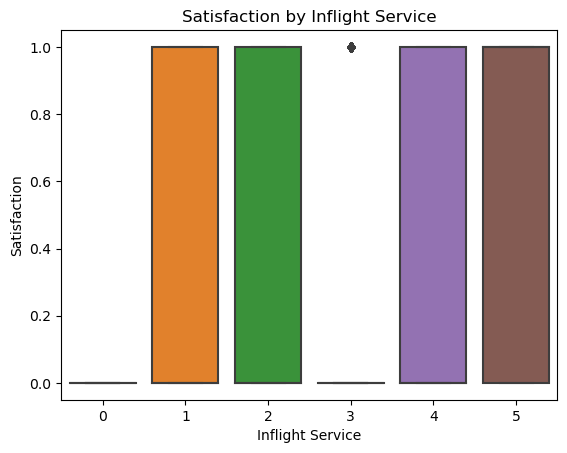

In [468]:
# Passenger's Satisfaction based off of Inflight Service
sns.boxplot(x='Inflight service', y='satisfaction', data=df)
plt.title('Satisfaction by Inflight Service')
plt.xlabel('Inflight Service')
plt.ylabel('Satisfaction')
plt.show()

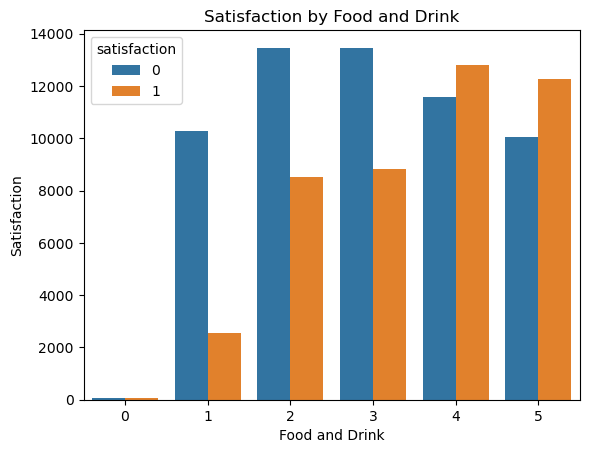

In [469]:
sns.countplot(x='Food and drink', hue='satisfaction', data=df)
plt.title('Satisfaction by Food and Drink')
plt.xlabel('Food and Drink')
plt.ylabel('Satisfaction')
plt.show()

# Training
[Back to Top](#table-of-contents)

Since we have only two results in our *satisfaction* column (neutral or dissatisfied & satisfied), we are going to use either kNN Classifier or a Decision Tree Classifier for our project.

To prep for the actual machine learning, we'll prep our y_train & y_test so that we can reuse them in all subsequent trials without having to redeclare/tweak it.

In [470]:
y_train = df['satisfaction'].values
y_test = dfTest['satisfaction'].astype('category').cat.codes

A helper function that simulates train_test_split but also with the added feature of normalizing our data. Also only works for X since we already did Y earlier.

In [471]:
def x_train_test_split(predictors):
    scaler = StandardScaler()
    xPred = scaler.fit_transform(df[predictors].values)
    testPred = scaler.fit_transform(dfTest[predictors].values)
    return (xPred, testPred)

In [472]:
# predictors = ['Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling']
# X_train, X_test = x_train_test_split(predictors)

# knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)

# predictions = knn.predict(X_test)
# accuracy = (predictions == y_test).mean()
# print(f'kNN 5-feature accuracy: {accuracy.round(2)}')

Now that we have a simple kNN Classifier model setup, we decided to run another test with all the columns as potential predictors. We also decided to tweak the hyper-parameters to see if we could speed up the kNN model.

In [473]:
# dfCopy = df.copy()
# dfCopy.drop('satisfaction', inplace=True, axis=1)
# predictors = dfCopy.columns
# X_train, X_test = x_train_test_split(predictors)

# knn = KNeighborsClassifier(algorithm='brute')  # 25s
# # knn = KNeighborsClassifier(algorithm='ball_tree') # over a min
# # knn = KNeighborsClassifier(algorithm='kd_tree') # 40s
# knn.fit(X_train, y_train)

# predictions = knn.predict(X_test)
# accuracy = (predictions == y_test).mean()
# print(f'kNN all-feature accuracy: {accuracy.round(2)}')

In [474]:
# dfCopy = df.copy()
# dfCopy.drop('satisfaction', inplace=True, axis=1)
# predictors = dfCopy.columns
# X_train, X_test = x_train_test_split(predictors)

# # tree = DecisionTreeClassifier(max_depth=2) # 0.86
# tree = DecisionTreeClassifier(max_depth=4) # 0.89, close enough to kNN accuracy but keeping the speed of trees.
# tree.fit(X_train, y_train)

# predictions = tree.predict(X_test)
# accuracy = (predictions == y_test).mean()
# print(f'Decision Tree all-feature accuracy: {accuracy.round(2)}')

Considering the lengthy runtime of kNN compared to the decision trees (30-40s vs ~0.3s) we decided to use `Decision Trees` from now on as our main model going forward. We'll now compare (TODO).

We'll start by investigating hyper parameters to improve our models accuracy. First, we'll tweak the `max_depth` and create a learning curve graph to pick out the optimal one. 

In [475]:
# # Code snippet from previous lab. Code to run plenty of tests with our model that'll map out different learning curves for all values of max_depth from 1 to 10.
# k = 10
# overallTE = []
# overallTR = []
# dfCopy = df.copy()
# dfCopy.drop('satisfaction', inplace=True, axis=1)
# predictors = dfCopy.columns
# X_train, X_test = x_train_test_split(predictors)

# for i in range(1, k+1, 1):
#     knn = DecisionTreeClassifier(max_depth=i)
#     te_errs = []
#     tr_errs = []
#     tr_sizes = np.linspace(100, X_train.shape[0], 10).astype(int)
#     for tr_size in tr_sizes:
#         # train model on a subset of the training data
#         X_train1 = X_train[:tr_size,:]
#         y_train1 = y_train[:tr_size]
#         knn.fit(X_train1, y_train1)
#         # Errors from Training & Test Data
#         tr_predicted = knn.predict(X_train1)
#         err = (tr_predicted != y_train1).mean()
#         tr_errs.append(err)
#         te_predicted = knn.predict(X_test)
#         err = (te_predicted != y_test).mean()
#         te_errs.append(err)
#     # Calc the learning curve values and append them for later.
#     tr_sizes, tr_errs, te_errs = learning_curve(
#         knn, X_train, y_train, cv=10, scoring='accuracy')
#     overallTR.append(np.mean(tr_errs, axis=1))
#     overallTE.append(np.mean(te_errs, axis=1))

In [476]:
# Same snippet from lab, but separated for easier tweaking of graphs.
# Make the resulting pairs "easier" to interpret
# color = ['red', 'green', 'blue', 'orange', 'purple', 'gold', 'violet', 'maroon', 'pink', 'lightblue']
# k = 1
# for i in range(0, len(overallTE), 1):
#     plt.plot(tr_sizes, overallTE[i], label=f'test {k}', color=color[i], ls='dashdot')
#     plt.plot(tr_sizes, overallTR[i], label=f'train {k}', color=color[i], linewidth=1.5, alpha=0.5)
#     k = k+1
# plt.legend(loc='right', prop={'size': 8})
# plt.xlabel('Training Sizes')
# plt.ylabel('Accuracy')
# plt.title('Learning Curve of Decision Tree w/ Different Max Depths')
# plt.show()

From this graph, we can see all the different gaps between the `max_depth` values and how the overall accuracy goes up as the depth increases. This can definitely be over fit if we go too far up, so we'll pick something in the middle with a small gap and then use that parameter for subsequent tests.

So going forward, `max_depth` will be set to *4*

In [477]:
# dfCopy = df.copy()
# dfCopy.drop('satisfaction', inplace=True, axis=1)
# predictors = dfCopy.columns
# X_train, X_test = x_train_test_split(predictors)

# parameters = [{'min_samples_leaf': [0.1, 0.2, 0.3], 'max_leaf_nodes': [4, 8, 16]}]
# tree = DecisionTreeClassifier(max_depth=4)
# test = GridSearchCV(tree, parameters, scoring='accuracy', cv=10)
# test.fit(X_train, y_train)

# print(f'Our best score was: {test.best_score_} and the best params were {test.best_params_}.')

Now we have gathered some decent hyper-parameters and can begin checking for the best predictors/features.

In [478]:
# TODO: Confirm if we need unsupervised anomaly detection
# def edist(x, y):
#     return np.sqrt(np.sum((x-y)**2))
# def dist(x):
#     m = x.shape[0]
#     dm = np.zeros((m,m))
#     for i in range(m):
#         for j in range(i, m):
#             dm[i,j] = edist(x[i,:], x[j, :])
#             dm[j,i] = dm[i,j]
#     return dm

# def knn_anomalies(dfCopy, k=3, threshold=3):
#     dm = dist(x)
#     sorted_distances = np.appy_along_axis(np.sort, 1, dm)
#     dist_to_k_nearest = sorted_distances[:,k]

#     dist_std = np.std(dist_to_k_nearest)
#     dist_mean = np.mean(dist_to_k_nearest)
#     dist_scaled = (dist_to_k_nearest - dist_mean)/dist_std
    
#     anomaly_indexes = np.where(dist_scaled > threshold)
#     return anomaly_indexes

# anoms = knn_anomalies((dfCopy.columns).values, k = 3, threshold = 3)

Finding best feature that has highest accuracy:

In [481]:
# from sklearn import tree
dfCopy = df.copy()
dfCopy.drop(columns='satisfaction', axis=1, inplace=True)
predictors = dfCopy.columns
# X_train, X_test, y_train, y_test = train_test_split(dfCopy, df['satisfaction'], test_size=0.2, random_state=42)
X_train, X_test = x_train_test_split(predictors)

colName = []
currentAccuracy = 0

for col in predictors:
    # X_train_1 = X_train.iloc[col]
    X_train_1 = X_train[[col]]
    scores = cross_val_score(DecisionTreeClassifier(random_state = 42), X_train_1, y_train, scoring='accuracy', cv=5)
    # scores = cross_val_score(tree.DecisionTreeClassifier(random_state = 42), X_train_1, y_train, scoring='accuracy', cv=5)
    accuracy = scores.mean()
    if (accuracy > currentAccuracy):
        currentAccuracy = accuracy
        colName = col
print('Best Feature: {}, Best Accuracy: {:.2f}'.format(colName, currentAccuracy))

[[-1.7452793  -0.73153876  0.20357895 ...  3.58677552  0.4727667
  -0.4727667 ]
 [-0.95136024 -0.95718354  0.20357895 ... -0.27880195 -2.11520819
   2.11520819]
 [-0.88520032 -0.04758435 -0.54953343 ... -0.27880195  0.4727667
  -0.4727667 ]
 ...
 [-0.62056063  0.8078601  -1.30264581 ... -0.27880195 -2.11520819
   2.11520819]
 [-1.14984    -0.18999128 -1.30264581 ... -0.27880195 -2.11520819
   2.11520819]
 [-0.8190404   0.53508063 -1.30264581 ... -0.27880195  0.4727667
  -0.4727667 ]]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Top 10 features that have lowest RMSE Values using forward search:

In [ ]:
# dfCopy = df.copy()
# dfCopy.drop(columns='satisfaction', axis=1, inplace=True)
# predictors = dfCopy.columns
# # X_train, X_test, y_train, y_test = train_test_split(dfCopy, df['satisfaction'], test_size=0.2, random_state=42)
# X_train, X_test = x_train_test_split(predictors)

# remaining = list(predictors)
# selected = []
# n = 10

# while len(selected) < n:
#     currentAccuracy = 0
#     colName = ''
#     for feature in remaining:
#         X_selected = X_train[selected + [feature]]
#         scores = cross_val_score(DecisionTreeClassifier(random_state = 42), X_selected, y_train, scoring='accuracy', cv=5)
#         accuracy = scores.mean()
#         if (accuracy > currentAccuracy):
#             currentAccuracy = accuracy
#             colName = feature

#     remaining.remove(colName)
#     selected.append(colName)
#     print('Feature: {}, Accuracy: {:.2f}'.format(colName, currentAccuracy))

Feature: Online boarding, Accuracy: 0.79
Feature: Type of Travel_Business travel, Accuracy: 0.85
Feature: Inflight wifi service, Accuracy: 0.89
Feature: Gate location, Accuracy: 0.92
Feature: Baggage handling, Accuracy: 0.93
Feature: Customer Type_disloyal Customer, Accuracy: 0.94
Feature: Class_Business, Accuracy: 0.95
Feature: Inflight service, Accuracy: 0.95
Feature: Seat comfort, Accuracy: 0.95
Feature: Customer Type_Loyal Customer, Accuracy: 0.95


From the previous cell, we determined we only need around roughly ~90% accuracy, so we decided to use just the top 5 features instead of all 10.

In [482]:
predictors = ['Online boarding', 'Type of Travel_Business travel', 'Inflight wifi service', 'Gate location', 'Baggage handling']
# TODO: Fix function so that we can use the legitimate split files.
# X_train, X_test, y_train, y_test = train_test_split(df[predictors], df['satisfaction'], test_size=0.2, random_state=42)
X_train, X_test = x_train_test_split(predictors)

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

predictions = tree.predict(X_test)
accuracy = (predictions == y_test).mean()
print(f'Final Decision Tree Accuracy: {accuracy.round(2)}%')

[[-0.1855316  -1.49061375  0.20357895 -1.54732272  0.31176855]
 [-0.1855316   0.6708646   0.20357895  0.01809426 -0.53504484]
 [ 1.29649608  0.6708646  -0.54953343 -0.76461423  0.31176855]
 ...
 [-1.66755928  0.6708646  -1.30264581  0.01809426  0.31176855]
 [-1.66755928  0.6708646  -1.30264581  1.58351124 -2.2286716 ]
 [-1.66755928  0.6708646  -1.30264581  0.01809426  0.31176855]]
Final Decision Tree Accuracy: 0.88%


Final Decision Tree Accuracy: 0.89
Confusion Matrix:
 [[10487  1226]
 [ 1161  7907]]


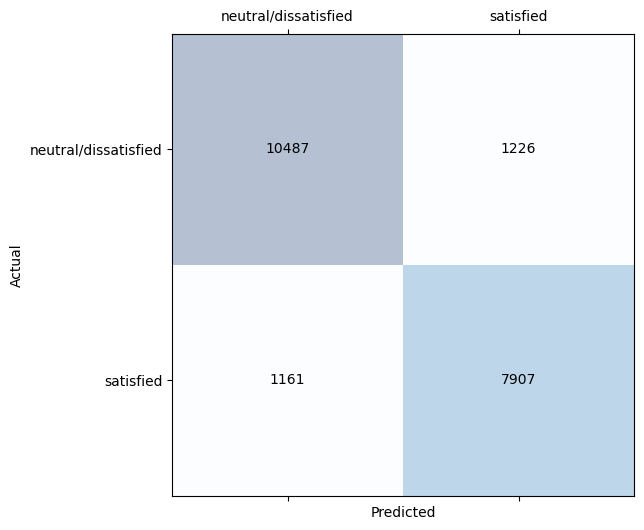

In [485]:
predictors = ['Online boarding', 'Type of Travel_Business travel', 'Inflight wifi service', 'Gate location', 'Baggage handling']

X_train, X_test, y_train, y_test = train_test_split(df[predictors], df['satisfaction'], test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

predictions = tree.predict(X_test)
predictions = [0 if p==0 else 1 for p in predictions]  # convert 0 to "neutral/dissatisfied", and 1 to "satisfied"
y_test = [0 if y==0 else 1 for y in y_test]  # convert 0 to "neutral/dissatisfied", and 1 to "satisfied"
correct_predictions = [1 if p==t else 0 for p, t in zip(predictions, y_test)]  # 1 if correct, 0 if incorrect
accuracy = sum(correct_predictions) / len(correct_predictions)

confusion = confusion_matrix(y_test, predictions)


print('Final Decision Tree Accuracy: {:.2f}'.format(accuracy))

---

# Conclusions

[Back to Top](#table-of-contents)

In [491]:
#  TODO: make a specific custom singular customer and test our model. Talk about the results.
import pandas as pd

# create a dictionary with the feature values for a single customer
new_data = {'Gender_Female': 1, 'Gender_Male': 0, 'Type of Travel_Business travel': 0,
            'Type of Travel_Personal Travel': 0, 'Class_Business': 0, 'Class_Eco': 1,
            'Class_Eco Plus': 0, 'Customer Type_Loyal Customer': 1, 'Customer Type_disloyal Customer': 0,
            'Age': 35, 'Flight Distance': 1000, 'Inflight wifi service': 1, 'Departure/Arrival time convenient': 5,
            'Ease of Online booking': 4, 'Gate location': 1, 'Food and drink': 4, 'Online boarding': 1,
            'Seat comfort': 3, 'Inflight entertainment': 4, 'On-board service': 4, 'Leg room service': 3,
            'Baggage handling': 0, 'Checkin service': 5, 'Inflight service': 5, 'Cleanliness': 4,
            'Departure Delay in Minutes': 1000, 'Arrival Delay in Minutes': 1000}

# create a DataFrame with the new data
new_df = pd.DataFrame(new_data, index=[0])

# use only the columns that are in your training data
predictors = ['Online boarding', 'Type of Travel_Business travel', 'Inflight wifi service', 'Gate location', 'Baggage handling']

# get the predicted satisfaction value for the new customer
prediction = tree.predict(new_df[predictors])

# convert the predicted value to a string
satisfaction = 'satisfied' if prediction[0] == 1 else 'neutral/dissatisfied'

print(f'The predicted satisfaction for the new customer is: {satisfaction}')

The predicted satisfaction for the new customer is: neutral/dissatisfied


Confusion Matrix:
 [[10487  1226]
 [ 1161  7907]]


C:\Users\warre\AppData\Local\Temp\ipykernel_50028\4098935750.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Hi', 'Hello'])
C:\Users\warre\AppData\Local\Temp\ipykernel_50028\4098935750.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Hi', 'Hello'])


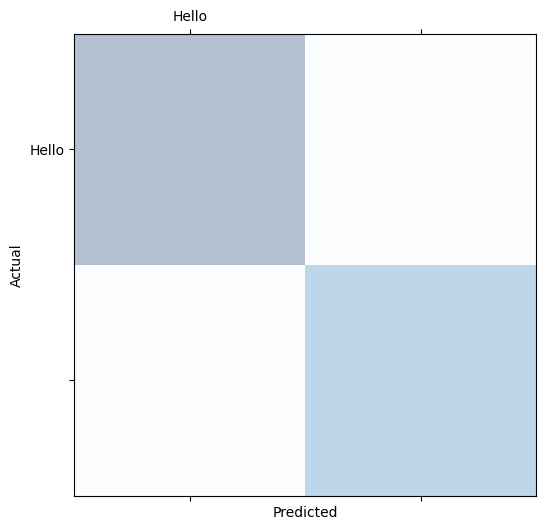

In [ ]:
print('Confusion Matrix:\n', confusion)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(confusion, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax.text(x=j, y=i, s=confusion[i, j], va='center', ha='center')

tick_labels = ['satisfied', 'neutral/dissatisfied']
ax.set_xticks([1, 0])
ax.set_yticks([1, 0])
ax.set_xticklabels(tick_labels)
ax.set_yticklabels(tick_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# TODO: Add markdown to talk about this.